# VGGNetの概要
VGGNetはILSVRC-2014で2位の画像認識モデルである. 1位はGoogLeNetであったが実装が複雑であるため省略する. ILSVRC-2014のタスクはILSVRC-2012と同様に画像を分類するタスクである. VGGNetのモデルはVGG-16とVGG-19の2つがあり, 数字は層数を意味している. 次に示すモデルはVGG-16であり, モデルがシンプルなことが特徴である. VGG-19は3層連続している畳み込み層を4層にしたモデルである.


- Input : (224,224,3)

- Conv1
    - Input : (224,224,3)
    - Filter : (3,3,64)
    - Stride : 1
    - Activation : ReLU
    - Output : (224,224,64)

- Conv2
    - Input : (224,224,64)
    - Filter : (3,3,64)
    - Stride : 1
    - Activation : ReLU
    - Output : (224,224,64)

- Max Pooling
    - Input : (224,224,64)
    - Filter : (2,2)
    - Stride : 2
    - Output : (112,112,64)

- Conv3
    - Input : (112,112,64)
    - Filter : (3,3,128)
    - Stride : 1
    - Activation : ReLU
    - Output : (112,112,128)

- Conv4
    - Input : (112,112,128)
    - Filter : (3,3,128)
    - Stride : 1
    - Activation : ReLU
    - Output : (112,112,128)

- Max Pooling
    - Input : (112,112,128)
    - Filter : (2,2)
    - Stride : 2
    - Output : (56,56,128)

- Conv5
    - Input : (56,56,128)
    - Filter : (3,3,256)
    - Stride : 1
    - Activation : ReLU
    - Output : (56,56,256)

- Conv6
    - Input : (56,56,256)
    - Filter : (3,3,256)
    - Stride : 1
    - Activation : ReLU
    - Output : (56,56,256)

- Conv7
    - Input : (56,56,256)
    - Filter : (3,3,256)
    - Stride : 1
    - Activation : ReLU
    - Output : (56,56,256)

- Max Pooling
    - Input : (56,56,256)
    - Filter : (2,2)
    - Stride : 2
    - Output : (28,28,256)

- Conv8
    - Input : (28,28,256)
    - Filter : (3,3,512)
    - Stride : 1
    - Activation : ReLU
    - Output : (28,28,512)

- Conv9
    - Input : (28,28,512)
    - Filter : (3,3,512)
    - Stride : 1
    - Activation : ReLU
    - Output : (28,28,512)

- Conv10
    - Input : (28,28,512)
    - Filter : (3,3,512)
    - Stride : 1
    - Activation : ReLU
    - Output : (28,28,512)

- Max Pooling
    - Input : (28,28,512)
    - Filter : (2,2)
    - Stride : 2
    - Output : (14,14,512)

- Conv11
    - Input : (14,14,512)
    - Filter : (3,3,512)
    - Stride : 1
    - Activation : ReLU
    - Output : (14,14,512)

- Conv12
    - Input : (14,14,512)
    - Filter : (3,3,512)
    - Stride : 1
    - Activation : ReLU
    - Output : (14,14,512)

- Conv13
    - Input : (14,14,512)
    - Filter : (3,3,512)
    - Stride : 1
    - Activation : ReLU
    - Output : (14,14,512)

- Max Pooling
    - Input : (14,14,512)
    - Filter : (2,2)
    - Stride : 2
    - Output : (7,7,512)

- Flatten
    - Input : (7,7,512)
    - Output : (25088)

- Dense
    - Input : (25088)
    - Activation : ReLU
    - Output : (4096)

- Dense
    - Input : (4096)
    - Activation : ReLU
    - Output : (4096)

- Dense
    - Input : (4096)
    - Activation : Softmax
    - Output : (1000)

# VGGNetの実装

## VGG-16

In [2]:
import tensorflow as tf
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

model = tf.keras.applications.vgg16.VGG16(weights='imagenet')

553467904/553467096 [==============================] - 15s 0us/step


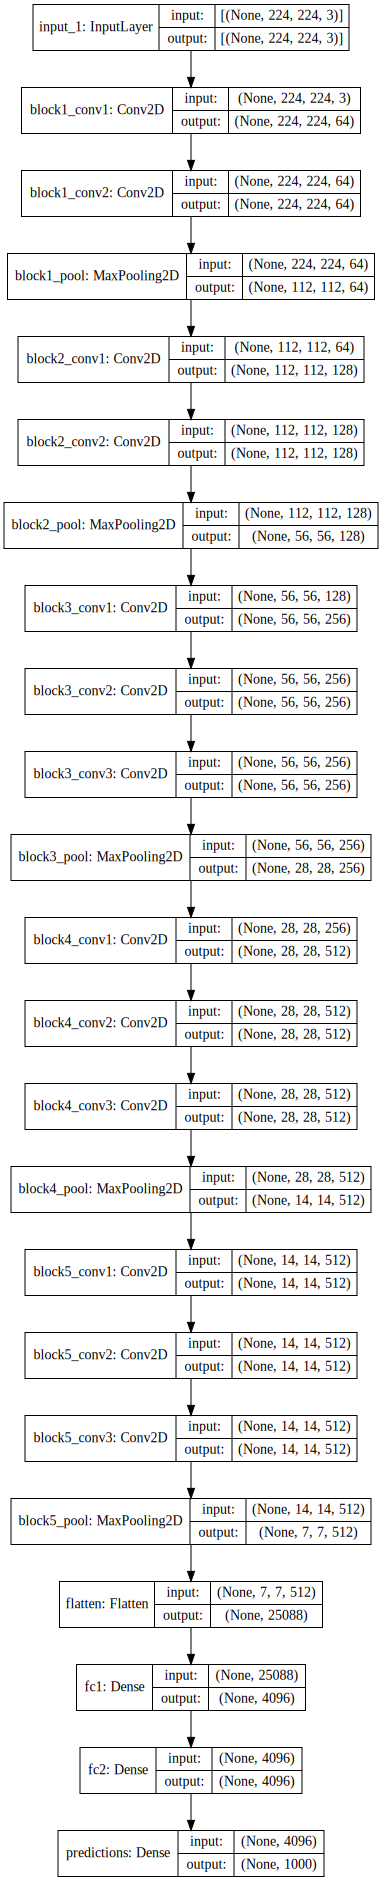

In [3]:
SVG(model_to_dot(model, show_shapes=True, dpi=None).create(prog='dot', format='svg'))

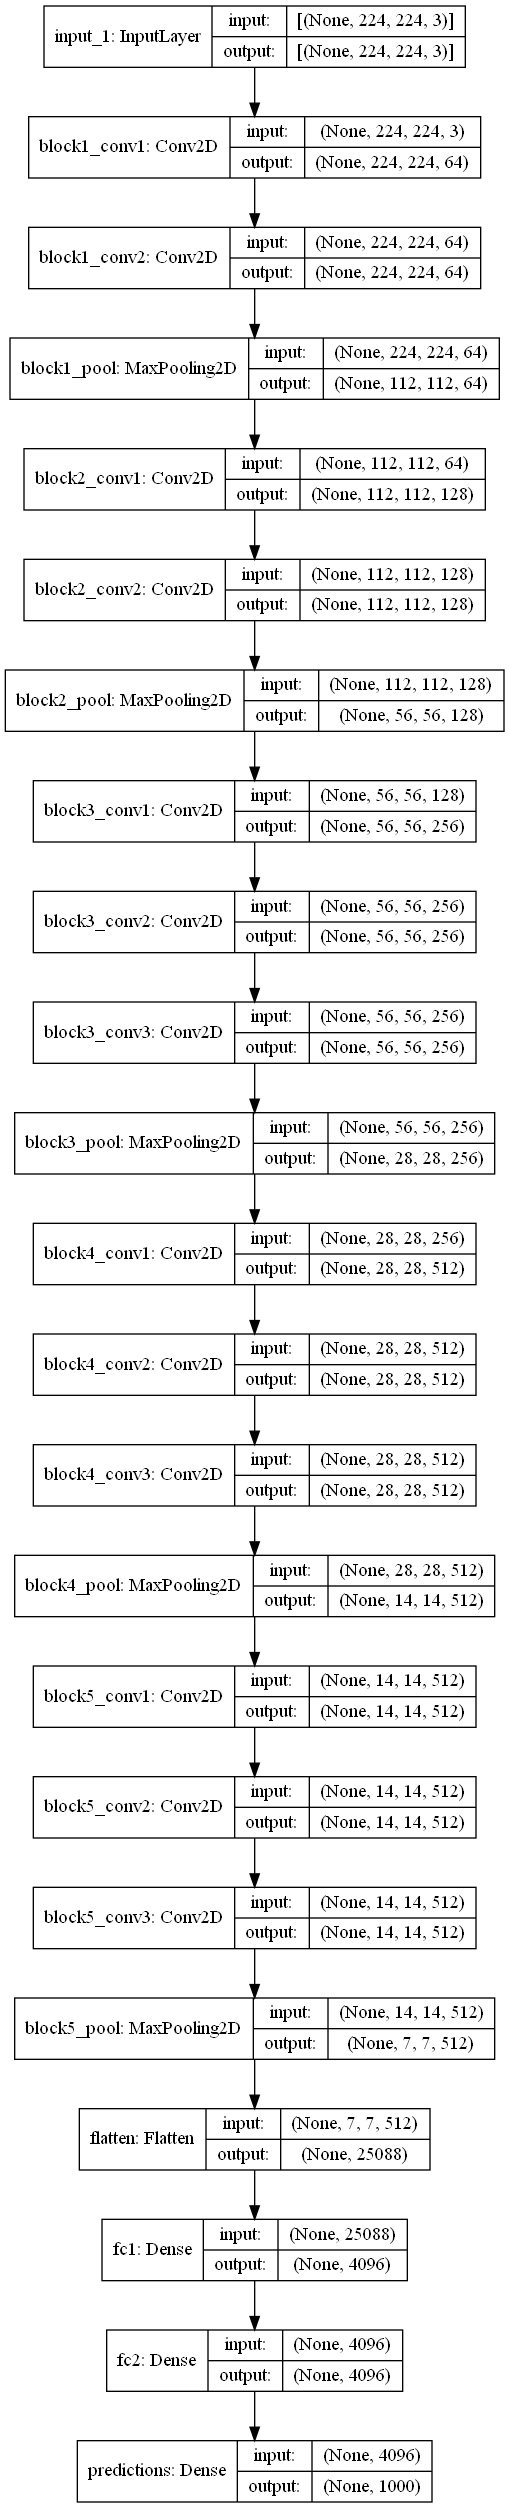

In [4]:
# モデルを画像として出力
from keras.utils import plot_model
plot_model(model,show_shapes=True,to_file='VGG-16.png')

## VGG-19

In [3]:
model = tf.keras.applications.vgg19.VGG19(weights='imagenet')

574717952/574710816 [==============================] - 21s 0us/step


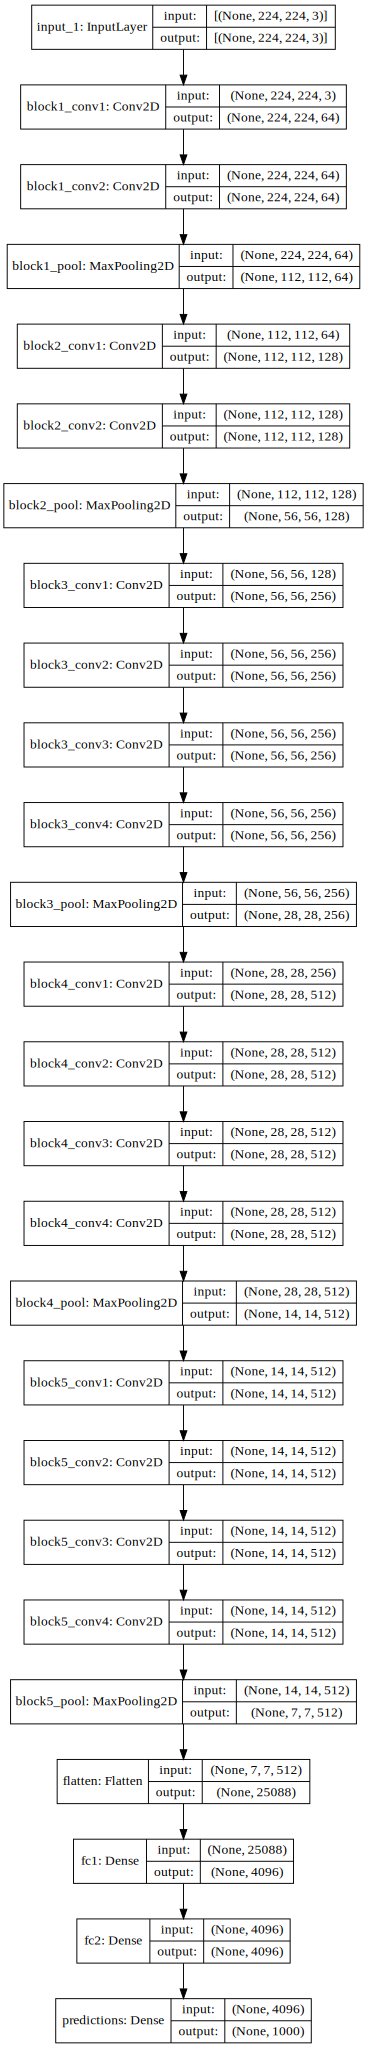

In [4]:
SVG(model_to_dot(model, show_shapes=True, dpi=None).create(prog='dot', format='svg'))

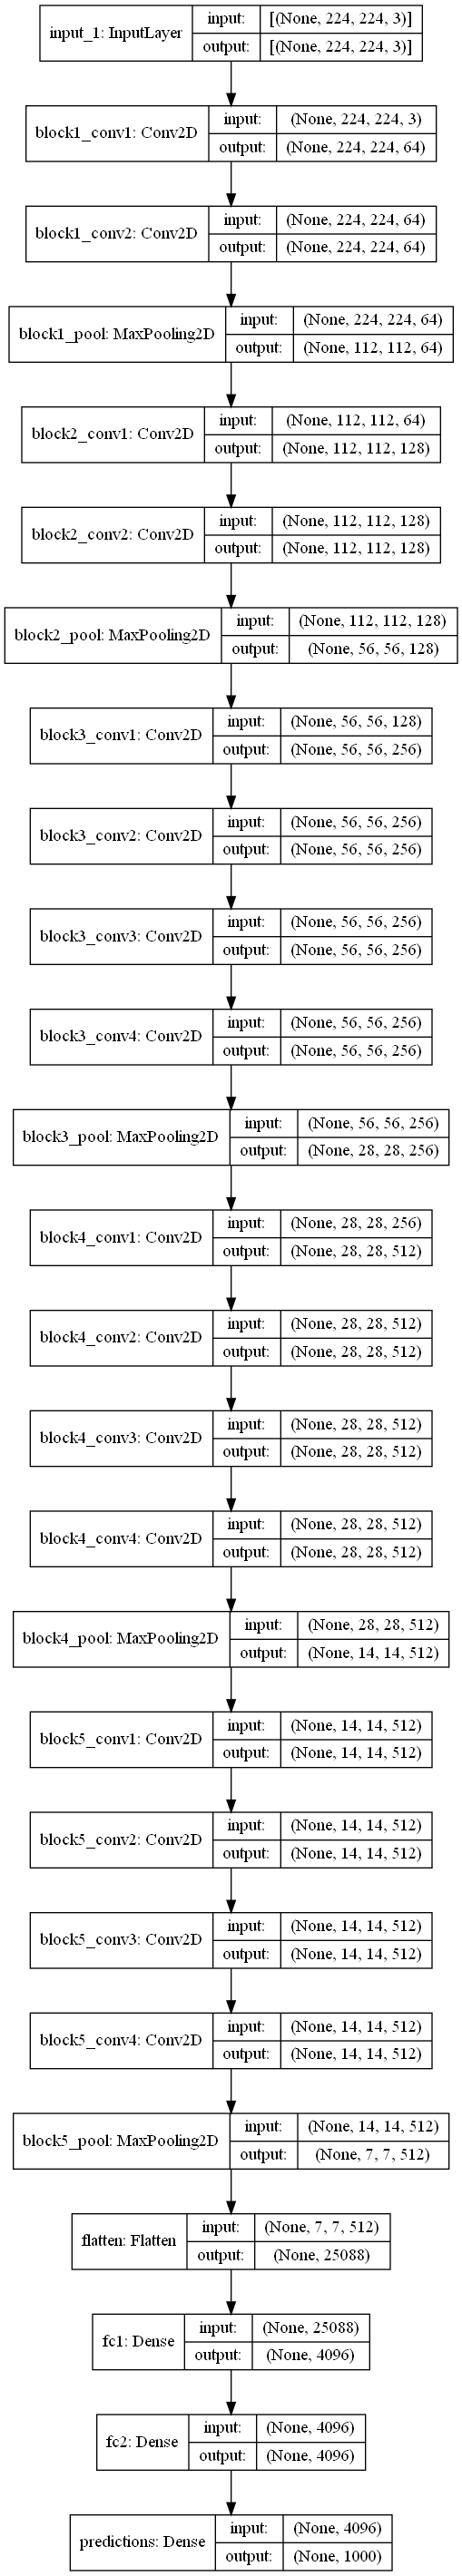

In [5]:
# モデルを画像として出力
from keras.utils import plot_model
plot_model(model,show_shapes=True,to_file='VGG-19.png')

## 転移学習モデル
kerasには事前学習したVGGNetのモデルがある. このモデルをベースとして学習を行うことを転移学習という. ここでは, VGG-16,VGG-19のそれぞれについてCIFAR-10で転移学習を行い,スコアを比較する. 

Reference :   
https://keras.io/ja/applications/#vgg16  
https://keras.io/ja/applications/#vgg19

### VGG-16ベースのモデル

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load CIFAR-10
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
y_train = np.eye(10)[y_train.astype('int32').flatten()]

x_test = x_test.astype('float32') / 255
y_test = np.eye(10)[y_test.astype('int32').flatten()]

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=10000)

In [3]:
import keras
import tensorflow as tf
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input

# base model(VGG-16)を読み込み
# include_top : 出力層側の3つのDenseを含むかどうか
base_model =  tf.keras.applications.vgg16.VGG16(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

# base modelに出力層を追加
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1028,activation="relu")(x)
prediction=Dense(10,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=prediction)

for layer in base_model.layers[:15]:
    layer.trainable = False
    
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer="adam",
    metrics=["accuracy"]
)

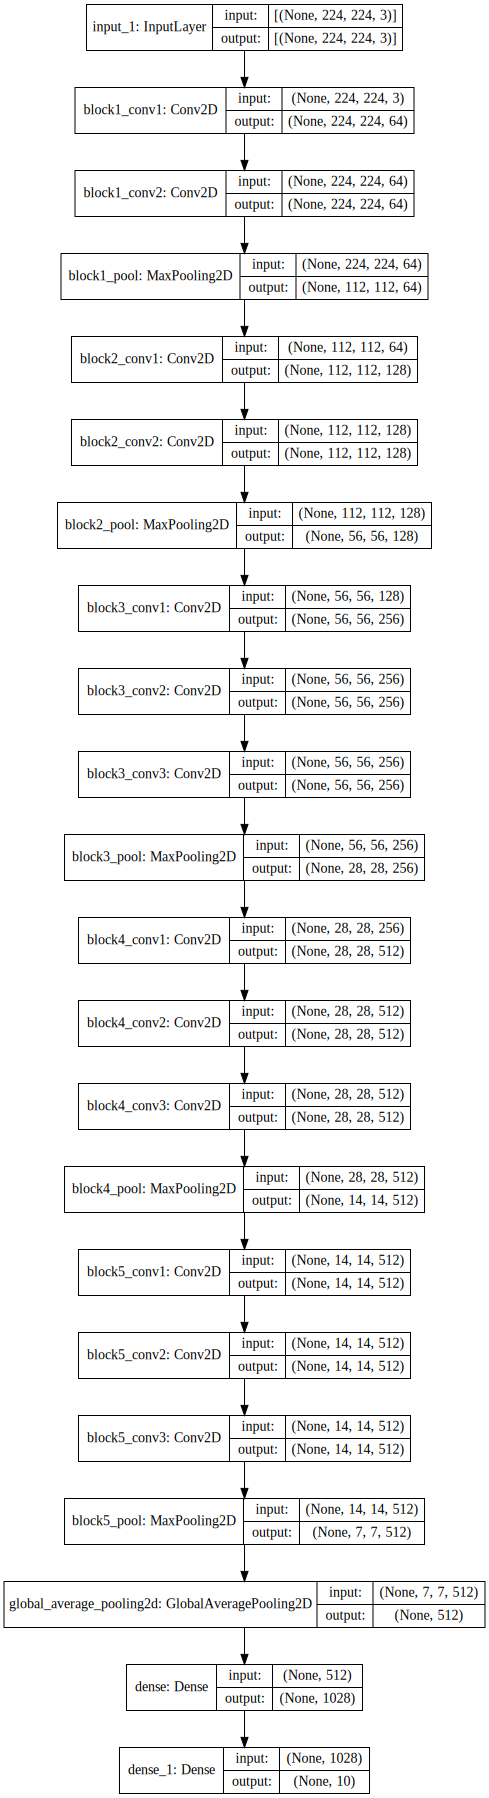

In [4]:
SVG(model_to_dot(model, show_shapes=True, dpi=None).create(prog='dot', format='svg'))

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen=ImageDataGenerator()

train_datagen.fit(x_train)
validation_datagen.fit(x_valid)

train_generator=train_datagen.flow(
    x_train,y_train,
    batch_size=100,
    shuffle=True
)

validation_generator=validation_datagen.flow(
    x_valid,y_valid,
    batch_size=100,
    shuffle=True
)

hist=model.fit_generator(train_generator,
                         epochs=50,
                         verbose=1,
                         validation_data=validation_generator)

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
400/400 [==============================] - 17s 34ms/step - loss: 1.4722 - accuracy: 0.4741 - val_loss: 0.9742 - val_accuracy: 0.6675
Epoch 2/50
400/400 [==============================] - 13s 33ms/step - loss: 0.9544 - accuracy: 0.6722 - val_loss: 0.9140 - val_accuracy: 0.6902
Epoch 3/50
400/400 [==============================] - 13s 33ms/step - loss: 0.8621 - accuracy: 0.7012 - val_loss: 0.8135 - val_accuracy: 0.7269
Epoch 4/50
400/400 [==============================] - 13s 33ms/step - loss: 0.7848 - accuracy: 0.7284 - val_loss: 0.8372 - val_accuracy: 0.7186
Epoch 5/50
400/400 [==============================] - 13s 33ms/step - loss: 0.7373 - accuracy: 0.7451 - val_loss: 0.7906 - val_accuracy: 0.7281
Epoch 6/50
400/400 [==============================] - 13s 33ms/step - loss: 0.7084 - accuracy: 0.7525 - val_loss: 0.7829 - val_accuracy: 0.7363
Epoch 7/50
400/400 [==============================] - 13s 33ms/step - loss: 0.6682 - accuracy: 0.7664 - val_loss: 0.7819 - val_accuracy:

In [7]:
def plot_loss(history):
    """エポックごとの損失関数をプロットする関数
    
    Args:
    history : fittingの履歴
    
    Returns:
    None
    """
    # 損失関数の履歴を取得
    loss_train = history.history["loss"]
    loss_val = history.history["val_loss"]

    # 損失関数をプロット
    epochs=range(1,len(history.history["loss"])+1)
    plt.figure(facecolor="white")
    plt.plot(epochs,loss_train,label="Training loss")
    plt.plot(epochs,loss_val,label="Validation loss")
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
def plot_acc(history):
    """エポックごとの正解率をプロットする関数
    
    Args:
    history : fittingの履歴
    
    Returns:
    None
    """
    acc_train = history.history['accuracy']
    acc_val = history.history['val_accuracy']
    epochs = range(1,len(history.history["accuracy"])+1)
    plt.figure(facecolor="white")
    plt.plot(epochs, acc_train, 'g', label='Training accuracy')
    plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

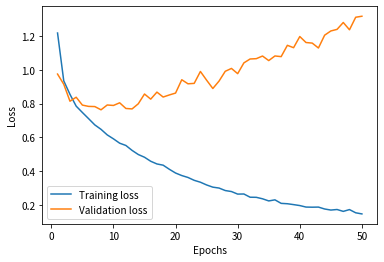

In [7]:
# 損失関数の描画
plot_loss(hist)

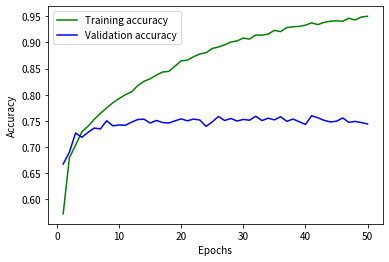

In [8]:
# 正解率を描画
plot_acc(hist)

In [9]:
# modelの評価
test_datagen=ImageDataGenerator()
test_datagen.fit(x_test)
test_generator=test_datagen.flow(
    x_test,y_test,
    batch_size=100,
    shuffle=True
)

scores = model.evaluate(test_generator)

100/100 [==============================] - 1s 13ms/step - loss: 1.3789 - accuracy: 0.7327


### VGG-19ベースのモデル

In [3]:
import keras
import tensorflow as tf
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input

# base model(VGG-16)を読み込み
# include_top : 出力層側の3つのDenseを含むかどうか
base_model =  tf.keras.applications.vgg19.VGG19(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

# base modelに出力層を追加
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1028,activation="relu")(x)
prediction=Dense(10,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=prediction)

for layer in base_model.layers[:15]:
    layer.trainable = False
    
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer="adam",
    metrics=["accuracy"]
)

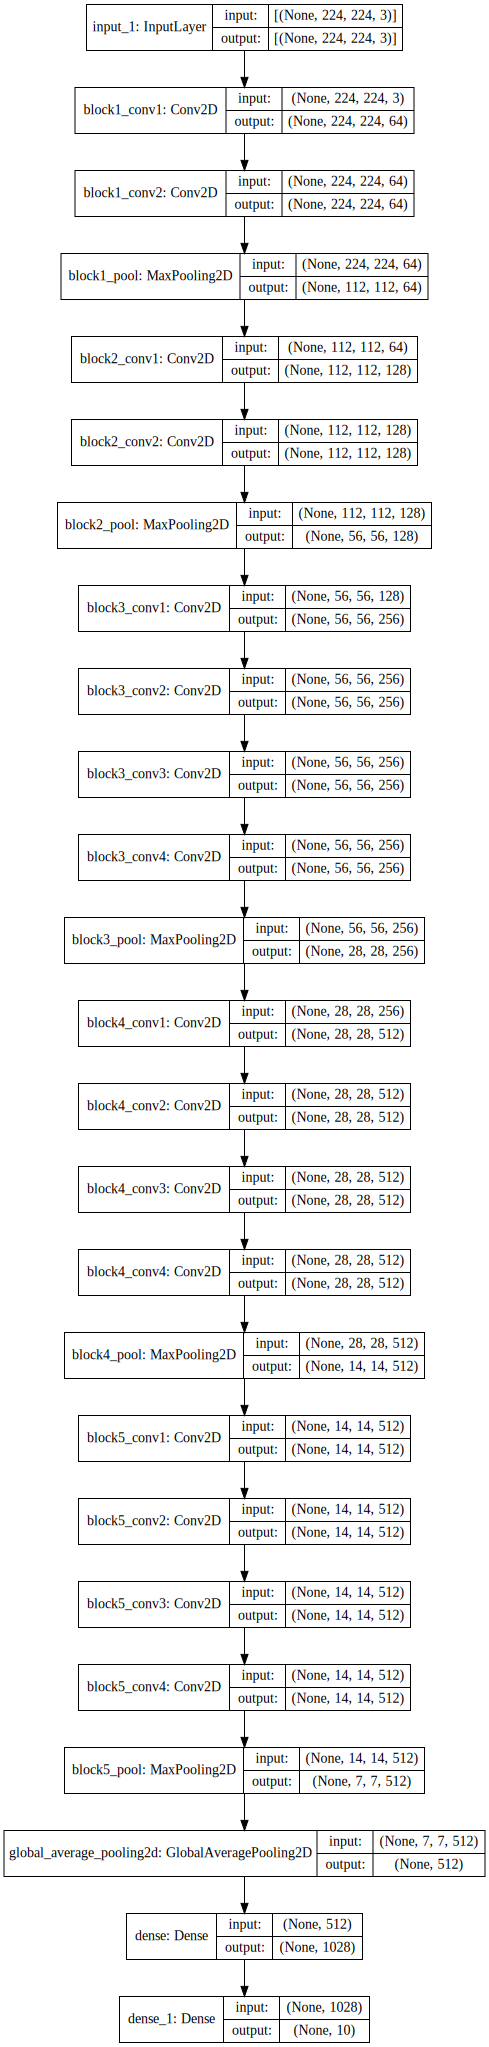

In [4]:
SVG(model_to_dot(model, show_shapes=True, dpi=None).create(prog='dot', format='svg'))

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen=ImageDataGenerator()

train_datagen.fit(x_train)
validation_datagen.fit(x_valid)

train_generator=train_datagen.flow(
    x_train,y_train,
    batch_size=100,
    shuffle=True
)

validation_generator=validation_datagen.flow(
    x_valid,y_valid,
    batch_size=100,
    shuffle=True
)

hist=model.fit_generator(train_generator,
                         epochs=50,
                         verbose=1,
                         validation_data=validation_generator)

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
400/400 [==============================] - 24s 38ms/step - loss: 2.0959 - accuracy: 0.1884 - val_loss: 1.1569 - val_accuracy: 0.5852
Epoch 2/50
400/400 [==============================] - 14s 35ms/step - loss: 1.1807 - accuracy: 0.5789 - val_loss: 1.0347 - val_accuracy: 0.6484
Epoch 3/50
400/400 [==============================] - 14s 35ms/step - loss: 1.0000 - accuracy: 0.6640 - val_loss: 0.9503 - val_accuracy: 0.6754
Epoch 4/50
400/400 [==============================] - 14s 35ms/step - loss: 0.9108 - accuracy: 0.6923 - val_loss: 0.8309 - val_accuracy: 0.7170
Epoch 5/50
400/400 [==============================] - 14s 34ms/step - loss: 0.8604 - accuracy: 0.7075 - val_loss: 0.8177 - val_accuracy: 0.7237
Epoch 6/50
400/400 [==============================] - 14s 34ms/step - loss: 0.8184 - accuracy: 0.7223 - val_loss: 0.8024 - val_accuracy: 0.7231
Epoch 7/50
400/400 [==============================] - 14s 34ms/step - loss: 0.7853 - accuracy: 0.7327 - val_loss: 0.7820 - val_accuracy:

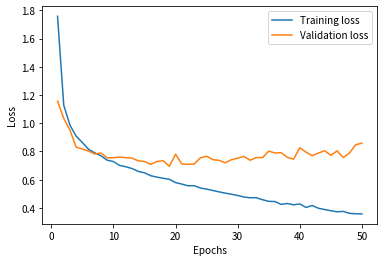

In [8]:
# 損失関数の描画
plot_loss(hist)

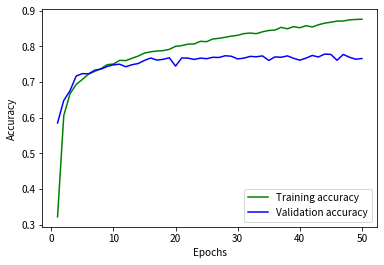

In [9]:
# 正解率を描画
plot_acc(hist)

In [10]:
# modelの評価
test_datagen=ImageDataGenerator()
test_datagen.fit(x_test)
test_generator=test_datagen.flow(
    x_test,y_test,
    batch_size=100,
    shuffle=True
)

scores = model.evaluate(test_generator)

100/100 [==============================] - 2s 15ms/step - loss: 0.8704 - accuracy: 0.7634
